# Test Notebook to read historical Nuuk data (sub-monthly)

### Load in some modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

from tidegauge_functions import read_tidegauge_psmsl

# %matplotlib notebook
%matplotlib inline
# %matplotlib widget

### A place for function development
NOTE that the function below is the "test" function (notice different function name) used for development in this notebook.  Production function is loaded from  `tidegauge_functions.py`

In [3]:
def test_read_tidegauge_historical(path, columns=None):
    """
    Read and parse PSMSL tide gauge data

    CSV Columns:
        'YEAR', 'MONTH', 'DAY', 'SSH', possibly 'HOUR'

    Parameters
    ----------
    path : str
        Filesystem path to data file
    columns: List

    Returns
    -------
    pandas.DataFrame
        Gravity data indexed by datetime.
    """
    columns = ['YEAR', 'MONTH', 'DAY', 'SSH']

    df = pd.read_csv(path, header=None, engine='c')

#     print(f'len(df.columns): {len(df.columns)}')
#     print(f'len(columns): {len(columns)}')
    
    if len(df.columns) == len(columns):
#         columns += ['unknown']
        df.columns = ['YEAR', 'MONTH', 'DAY', 'SSH']
        dt = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
    else:
        df.columns = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'SSH']
        dt = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY', 'HOUR']])
        
    # missing data to NaNs
    df['SSH'] = df['SSH'].replace(-32767, np.nan)
    
    # create datetime index
    df.index = pd.DatetimeIndex(dt)
    
    
    return df

In [7]:
dir_in = 'data/tidegauge'
# file_in = 'h820'
file_in = 'WL_NUUK_34248_1970-2002'
ext = '.txt'

filepath = os.path.join(dir_in, file_in + ext)

colnames=['DATETIME', 'SSH'] 
df = pd.read_fwf(filepath, names=colnames, header=None)

In [24]:
print(df.describe())
df.head()
df.loc[df.SSH > 500] = np.nan

           DATETIME            SSH
count  8.268680e+05  826868.000000
mean   1.985648e+11      13.387273
std    9.777270e+08     115.224018
min    1.970062e+11    -296.000000
25%    1.976103e+11     -76.000000
50%    1.987021e+11      13.000000
75%    1.995073e+11      99.000000
max    2.002042e+11     991.000000


In [25]:
dt = pd.to_datetime(df['DATETIME'], format="%Y%m%d%H%M") # format="%m/%d/%Y %I:%M:%S %p"))
dt

DATETIME
1970-06-19 16:15:00   1970-06-19 16:15:00
1970-06-19 16:30:00   1970-06-19 16:30:00
1970-06-19 16:45:00   1970-06-19 16:45:00
1970-06-19 17:00:00   1970-06-19 17:00:00
1970-06-19 17:15:00   1970-06-19 17:15:00
                              ...        
2002-04-18 17:15:00   2002-04-18 17:15:00
2002-04-18 17:30:00   2002-04-18 17:30:00
2002-04-18 17:45:00   2002-04-18 17:45:00
2002-04-18 18:00:00   2002-04-18 18:00:00
2002-04-18 18:15:00   2002-04-18 18:15:00
Name: DATETIME, Length: 826868, dtype: datetime64[ns]

In [26]:
df.index = pd.DatetimeIndex(dt)

(-300.0, 300.0)

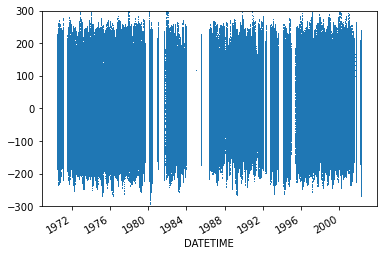

In [27]:
ax = df['SSH'].plot(marker=',', linestyle='')
# ax.set_xlim(pd.Timestamp('2015-08-01'), pd.Timestamp('2015-09-01'))
ax.set_ylim(-300, 300)

### Histogram

- What is the mean?
- Is distribution symmetric?

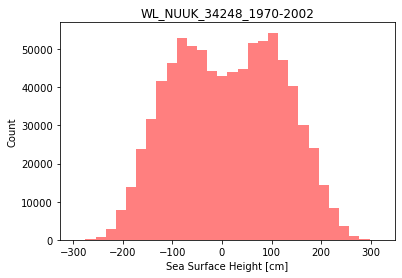

In [45]:
plt.figure(facecolor='white')
plt.hist(df['SSH'], bins=30, alpha=0.5,color='red')
plt.title(file_in);
plt.xlabel("Sea Surface Height [cm]")
plt.ylabel("Count")
plt.show()

### Plotting using **matplotlib.pyplot** method instead of built-in Pandas
use `plt.plot()`

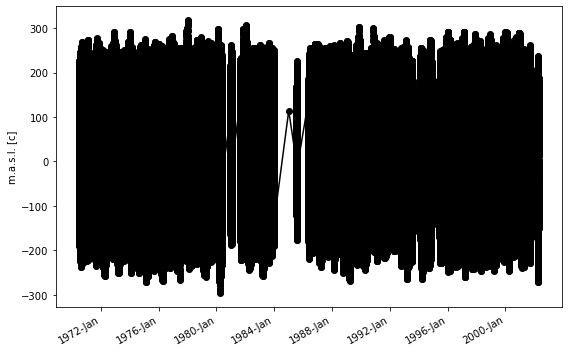

In [46]:
    # Set up
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

# Plot
ln1 = ax.plot(df['SSH'], '-ok')

# Customize
ax.set_title('')
# ax.set_xlim([my_levels[0], my_levels[-1]])
# ax.set_ylim(my_plotmin, 0)
plt.ylabel('m.a.s.l. [c]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
fig.autofmt_xdate()
plt.tight_layout()
# plt.savefig(f'figs/test_tsplot_SSH_{file_in}.png')

### Plot each year on top of eachother
Do this by masking by `df.index.year`

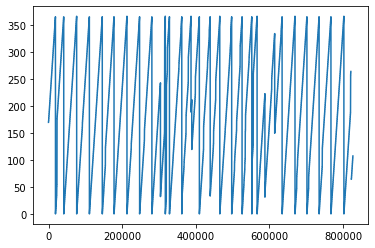

In [30]:
plt.plot(df.index.dayofyear)

1970.0
1971.0
1972.0
1973.0
1974.0
1975.0
1976.0
1977.0
1978.0
1979.0
1980.0
1981.0
1982.0
1983.0
1984.0
1985.0
1986.0
1987.0
1988.0
1989.0
1990.0
1991.0
1992.0
1993.0
1994.0
1995.0
1996.0
1997.0
1998.0
1999.0
2000.0
2001.0
nan
2002.0


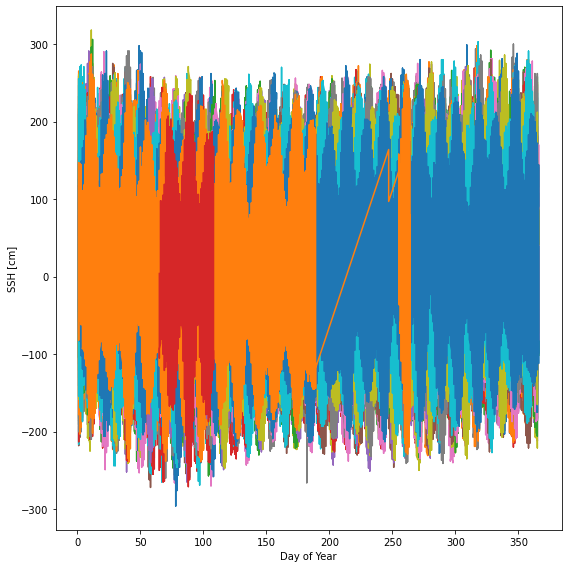

In [47]:
# Set up
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

for yr in df.index.year.unique():
    print(yr)
# Plot
    ax.plot(df[df.index.year==yr].index.dayofyear, df[df.index.year==yr]['SSH'])

# ax.plot(df[df.index.year==2016]['SSH'])
plt.xlabel('Day of Year')
plt.ylabel('SSH [cm]')
plt.tight_layout()

## Create some climatologies using `groupby` method
Monthly and Daily

Text(0, 0.5, 'SSH [cm]')

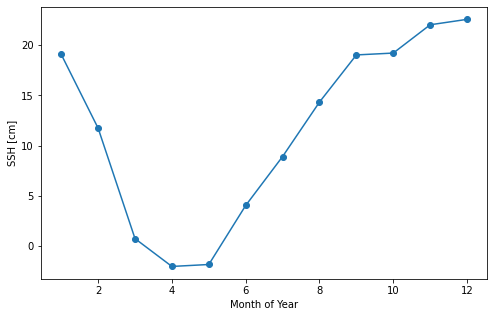

In [48]:
fig = plt.figure(figsize=(8,5))
monthly_climatology = df.groupby(df.index.month).mean()
monthly_climatology.SSH.plot(marker='o')
plt.xlabel('Month of Year')
plt.ylabel('SSH [cm]')

Text(0, 0.5, 'SSH [cm]')

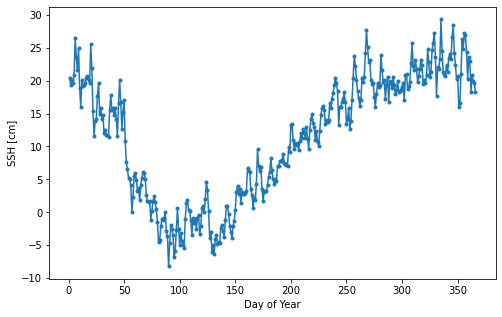

In [49]:
daily_climatology = df.groupby(df.index.dayofyear).mean() #aggregate({'SSH_DAILY_MEAN': 'mean',
#                                                             'SSH_DAILY_MAX': 'max',
#                                                             'SSH_DAILY_MIN': 'min'})
fig = plt.figure(figsize=(8,5))
daily_climatology.SSH.plot(marker='.')
plt.xlabel('Day of Year')
plt.ylabel('SSH [cm]')

### Standardize
Subtract the mean and divide by standard deviation

In [51]:
def standardize(x):
    return (x - x.mean())#/x.std()

anomaly = df.groupby(df.index.month).transform(standardize)
anomaly.plot(y='SSH [cm]')

ValueError: Length mismatch: Expected axis has 825430 elements, new values have 826868 elements

## Monthly (Spada) data

In [52]:
def test_read_tidegauge_monthly(monthly_file):
    column_names=['Year', 'SSH', 'unknown1', 'unknown2']
    df = pd.read_csv(monthly_file, header=None, delimiter=';', names=column_names)
    
    # NaNs
    df['SSH'] = df['SSH'].replace(-99999, np.nan) 
    
    # Datetime operations
    year = df['Year'].astype(int)
    month = ((df['Year'] - year) * 12).astype(int) + 1
    dt = pd.to_datetime(year.astype(str) + month.astype(str), format='%Y%m')
    df = df.rename(columns={'Year': 'YearDec'})
    df.index = pd.DatetimeIndex(dt)

    return df

# Nuuk (spada)
df_monthly = test_read_tidegauge_monthly('data/tidegauge/915.csv')

# QIKI
# df_monthly = test_read_tidegauge_monthly('data/tidegauge/m1935.csv')

# convert cm to mm
# df_monthly['SSH'] = df_monthly['SSH'] * 10

df_monthly.head()

,YearDec,SSH,unknown1,unknown2
Year,,,,
1958-05-01,1958.3750,-108.0,0,0
1958-06-01,1958.4583,18.0,0,0
1958-07-01,1958.5417,55.0,0,0
1958-08-01,1958.6250,21.0,0,0
1958-09-01,1958.7083,182.0,0,0


<AxesSubplot:xlabel='Year'>

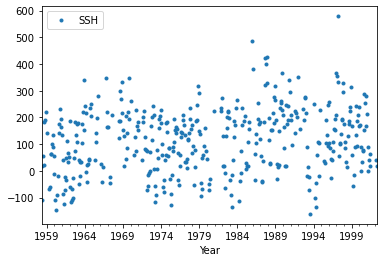

In [53]:
df_monthly.plot.line(y='SSH', linestyle='',marker='.')

### Compare 15 minute and monthly (spada) data

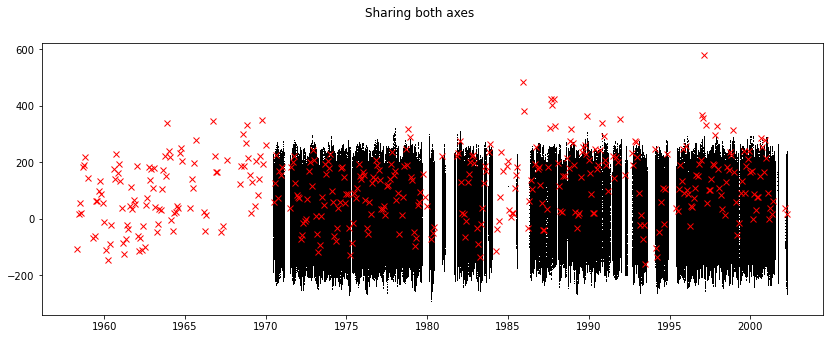

In [85]:
# df_monthly.plot.line(y='SSH', linestyle='',marker='.', label='Spada')
# df.plot(y='SSH', marker=',', linestyle='', label='15min')

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(14,5))
fig.suptitle('Sharing both axes')

axes.plot(df.SSH, 
            color='black', marker=',', linestyle='', label='15 min')
axes.plot(df_monthly.SSH, 
            color='red', marker='x', linestyle='', label='Monthly')

### now calculate monthly trend and compare to Spada's published rate

In [87]:
from tidegauge_functions import calc_OLS_tides

res = calc_OLS_tides(df_monthly, 'SSH')
trend = res.params.x1

print(f"Trend = {trend * 1:.2f} mm/yr")

print(res.summary())

fig, ax = plt.subplots(1, 1, figsize=(12,6));
ax.plot(df_monthly['SSH'].dropna().index, df_monthly['SSH'].dropna().values, label='trend')
ax.plot(df_monthly['SSH'].dropna().index, [res.params.x1*i + res.params.const for i in np.arange(len(df_monthly['SSH'].dropna()))])
# ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
# ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
# ax[1].hlines(0, 0, len(res.resid), color='k');
ax.set_title(f"Trend = {res.params.x1 * 1:.2f} mm/yr");
# ax[1].set_title("Residuals");
plt.suptitle(f"{filepath[-21:4]}")
# plt.savefig(f'figs/test_GPS_OLS_{file_in[:4]}.png')

Trend = 0.21 mm/yr
                            OLS Regression Results                            
Dep. Variable:                    SSH   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     18.48
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.15e-05
Time:                        17:36:31   Log-Likelihood:                -2546.6
No. Observations:                 412   AIC:                             5097.
Df Residuals:                     410   BIC:                             5105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.9691     11.535 

Text(0.5, 0.98, '')

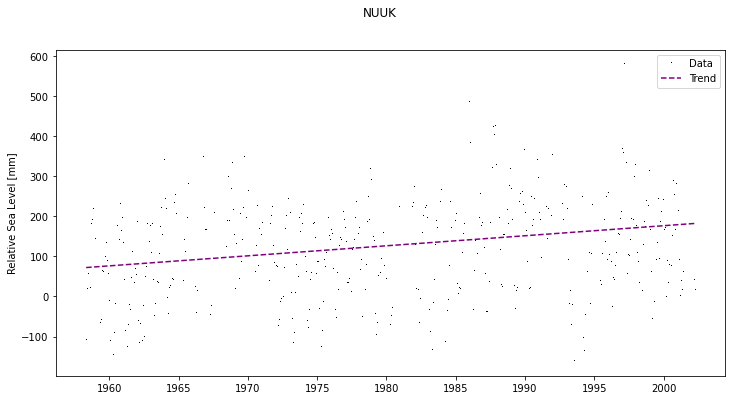

In [59]:
plot_OLS_overlay(df_monthly, res, 'NUUK', 'SSH', 'Relative Sea Level [mm]', simpletrend=True)

# Example reading in CCAR data

In [67]:
from tidegauge_functions import find_skiprows_startofline

infile = 'data/CCAR/CCAR_altimetry_642500N_517500W_tidegauge_820.csv'

i_skip = find_skiprows_startofline(infile, 'time')
print(i_skip)

df_CCAR = pd.read_csv(infile, header=None, skiprows=i_skip)

df_CCAR

17


,0,1,2,3,4
0,1992.752225,-3.797284,NaN,2014.518138,2.629235
1,1992.765914,-2.456437,NaN,2014.531828,-3.870765
2,1992.779603,-1.942245,NaN,2014.545517,-5.170765
3,1992.793292,-4.629961,NaN,2014.559206,0.329235
4,1992.806982,-8.471432,NaN,2014.572895,-4.970765
...,...,...,...,...,...
1916,2019.008214,7.011869,NaN,NaN,NaN
1917,2019.021903,4.850990,NaN,NaN,NaN
1918,2019.035592,2.914328,NaN,NaN,NaN
1919,2019.049281,1.872063,NaN,NaN,NaN


In [68]:
def test_read_CCAR_altimetry(ccar_file):
    i_skip = find_skiprows_startofline(ccar_file, 'time')
    column_names=['Year', 'SSH', '', 'Year2', 'SSH_tides']
    df = pd.read_csv(ccar_file, 
                     skiprows=i_skip,
                     header=None, 
                     delimiter=',', 
                     names=column_names)
    
    # NaNs
#     df['SSH'] = df['SSH'].replace(-99999, np.nan) 
    
    ## Datetime operations
    year = df['Year'].astype(int)
    doy = ((df['Year'] - year) * 365).astype(int) + 1  # TODO: This might be off by one day...
    dt = pd.to_datetime(year.astype(str) + doy.astype(str), format='%Y%j')
    df = df.rename(columns={'Year': 'YearDec'})
    df.index = pd.DatetimeIndex(dt)
    
    # delete unused columns
    df = df.drop([df.columns[2], 'Year2', 'SSH_tides'], axis=1)

    return df

infile = 'data/CCAR/CCAR_altimetry_642500N_517500W_tidegauge_820.csv'
df_CCAR = test_read_CCAR_altimetry(infile)
df_CCAR

,YearDec,SSH
Year,,
1992-10-01,1992.752225,-3.797284
1992-10-06,1992.765914,-2.456437
1992-10-11,1992.779603,-1.942245
1992-10-16,1992.793292,-4.629961
1992-10-21,1992.806982,-8.471432
...,...,...
2019-01-03,2019.008214,7.011869
2019-01-08,2019.021903,4.850990
2019-01-13,2019.035592,2.914328


<AxesSubplot:xlabel='Year'>

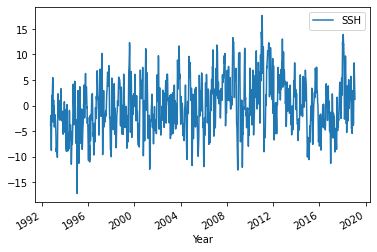

In [69]:
df_CCAR.plot.line(y='SSH')

## plotting examples

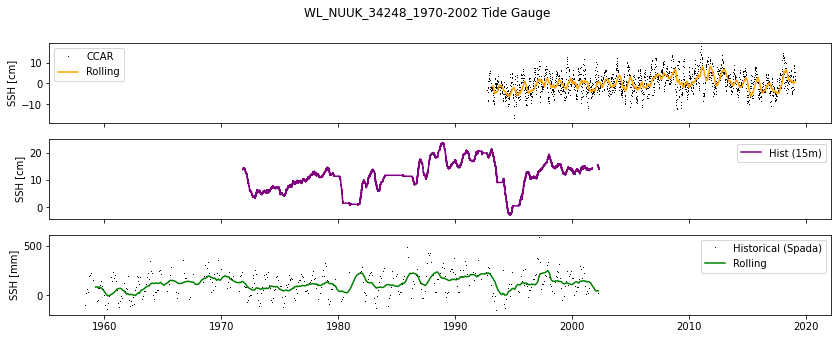

In [79]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(14,5))
fig.suptitle('Sharing both axes')

axes[0].plot(df_CCAR.SSH, 
            color='black', marker=',', linestyle='', label='CCAR')
axes[0].plot(df_CCAR.SSH.rolling(30).mean(), 
            color='orange', linestyle='-', label='Rolling')
# axes[1].plot(df.SSH[::24*4], 
#             color='black', marker=',', linestyle='', label='Hist (15min)')
axes[1].plot(df.SSH.interpolate().rolling(365*24*4).mean(), 
            color='purple', linestyle='-', label='Hist (15m)')
axes[2].plot(df_monthly.SSH, 
            color='black', marker=',', linestyle='', label='Historical (Spada)')
axes[2].plot(df_monthly.SSH.interpolate().rolling(12).mean(), 
            color='green', linestyle='-', label='Rolling')
# axes[3].plot(df_monthly.SSH, 
#             color='black', marker=',', linestyle='', label='Historical (Spada)')
# axes[3].plot(df_monthly.SSH.interpolate().rolling(12).mean(), 
#             color='green', linestyle='-', label='Rolling')

plt.suptitle(f'{file_in} Tide Gauge')
axes[0].set_ylabel('SSH [cm]')
axes[0].legend()
axes[1].set_ylabel('SSH [cm]')
axes[1].legend()
axes[2].set_ylabel('SSH [mm]')
axes[2].legend()
# plt.savefig('figs/test_lineplot_stacked_tidegauge_SARIMAX_forecast_KULU.png')

# Write out new 15 minute data to a CSV 

In [80]:
columns = ['DATETIME', 'SSH_cm']
out_array = np.array([df.index.strftime("%Y-%m-%d %H:%M"),
                      df['SSH']])

df_out = pd.DataFrame(data=out_array.T, columns=columns) #, index=time)
df_out = df_out.apply(pd.to_numeric, errors='ignore')
# df.index = pd.to_datetime(trajectory.index)
df_out.to_csv('data/historical_Nuuk_15min_tidegauges.csv')  # , na_rep=" ")